# Predicting heart diease via machine learning by Jacob Schmidt

This notebook applies various python ml and data science modules to predict whether someone has heart disease or not

## 1. Problem Definition

> Given patient features, can we predict if someone has heart disease or not

## 2. Data

The original data came from UCI ML repository

Version also available via kaggle

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart diease during the proof of concept, we'll pursue the project. 

## 4. Features 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

Using pandas, Matplotlib and Numpy for data analysis and manipilation

In [1]:
# import all the tools we need

# regular EDA and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evals
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data Exploration

The goal here is to find out more about the data, become more familiar on df you're working with

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What is missing from df and how do you deal with it?
4. Where are the outliers, and why should you care?
5. How can you add/change/remove features to get more out of df?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# how many yes/no in target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

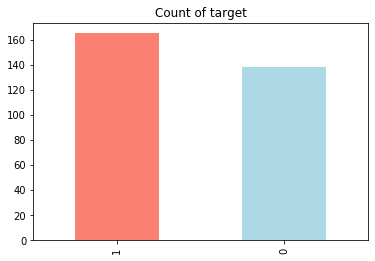

In [5]:
df['target'].value_counts().plot(kind='bar',
                                 title='Count of target',
                                 color=['salmon', 'lightblue']);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [9]:
df['sex'].value_counts()
# 1 = male

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target with sex column
pd.crosstab(df['target'], df['sex'])

# according to our sample, 75% of women have heart disease 
# 50% male have heart disease
# ~ 62% of all patients have heart disease

sex,0,1
target,,
0,24,114
1,72,93


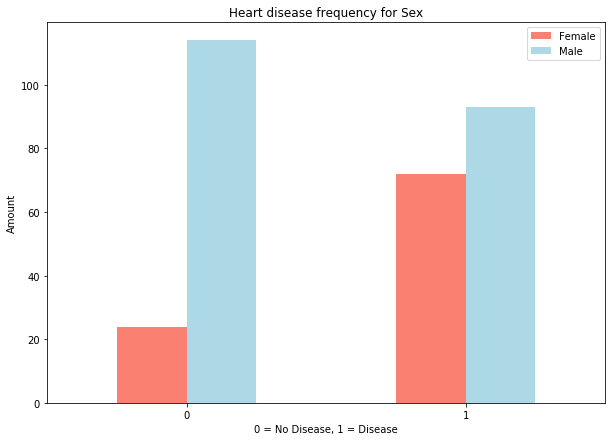

In [11]:
# create a plot of crosstab
pd.crosstab(df['target'], df['sex']).plot(kind='bar',
                                          figsize=(10, 7),
                                          color=['salmon', 'lightblue'],
                                          title='Heart disease frequency for Sex',
                                          )
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [12]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease

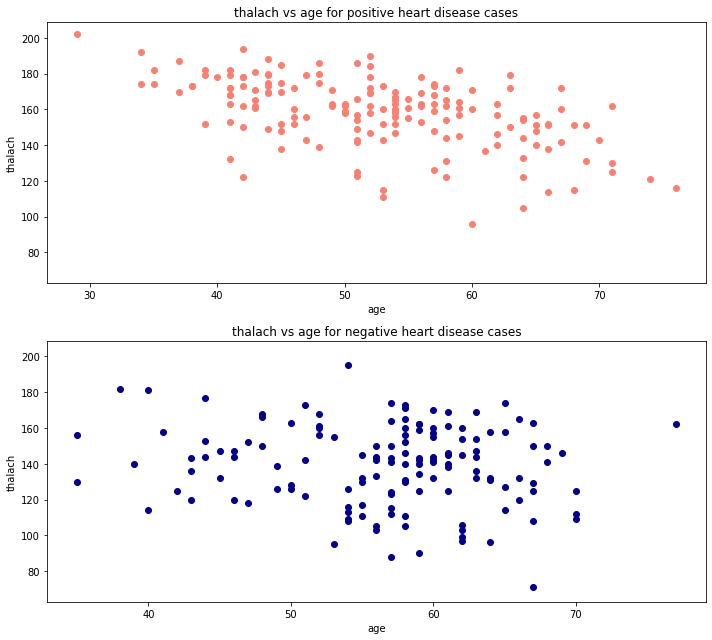

In [13]:
# analyzing separately
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(10,9))

# plot one: thalach and age for positive cases
ax[0].scatter(df['age'][df['target'] == 1],
              df['thalach'][df['target'] == 1],
              c='salmon')

ax[0].set(title='thalach vs age for positive heart disease cases',
          ylabel='thalach',
          xlabel='age')



# plot two: thalach and age for negative cases
ax[1].scatter(df['age'][df['target'] == 0],
              df['thalach'][df['target'] == 0],
              c='darkblue')

ax[1].set(title='thalach vs age for negative heart disease cases',
          ylabel='thalach',
          xlabel='age')


fig.tight_layout()

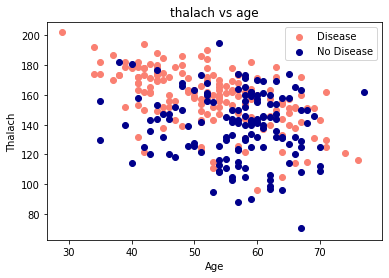

In [14]:
# analyzing together
plt.scatter(df['age'][df['target'] == 1],
              df['thalach'][df['target'] == 1],
              c='salmon',
              label='Disease')

plt.scatter(df['age'][df['target'] == 0],
              df['thalach'][df['target'] == 0],
              c='darkblue',
              label='No Disease')

plt.title('thalach vs age')
plt.xlabel('Age')
plt.ylabel('Thalach')
plt.legend();

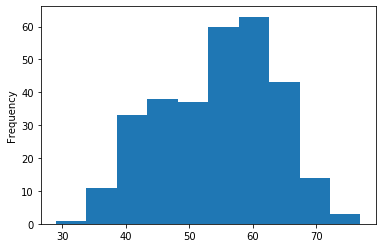

In [15]:
# check distribution of age column with histogram
df['age'].plot(kind='hist');

## Heart Disease Frequency per Chest Pain Type

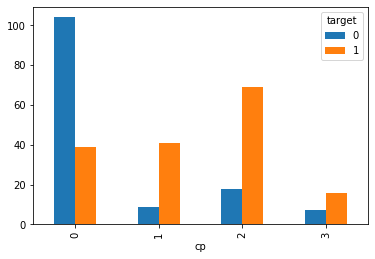

In [16]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar');

In [17]:
# make a correlation mI am writing to express my interest in the Data Assistant position. As an Economics major with a minor in Data Analytics, I am naturally attracted to a career where I can use my strong analytical, statistical and programming skills to generate predictions and solve critical thinking problems. This position would allow me to develop these skills and gain knowledge about an industry I am extremely interested in.
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

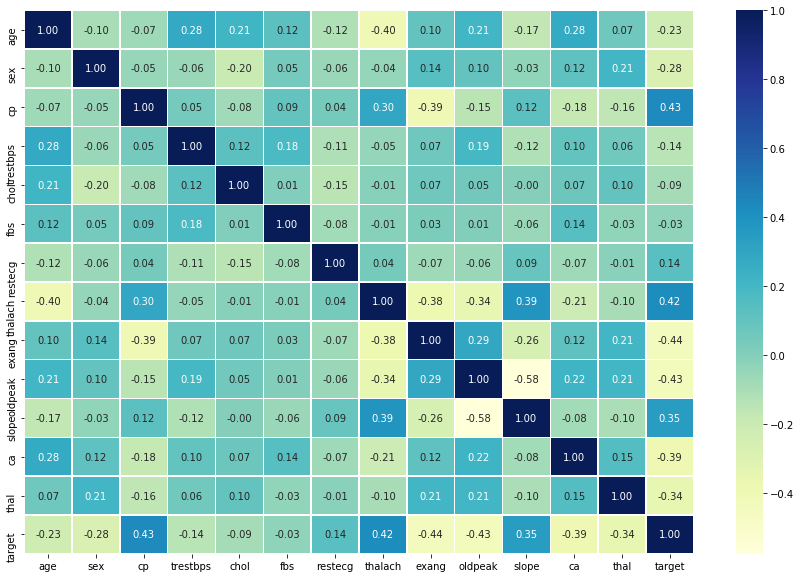

In [18]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='YlGnBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - .5)

## 5. Modeling

In [19]:
df.shape

(303, 14)

In [20]:
# split data into x and y 
X, y = df.drop('target', axis=1), df['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2)
preds = LogisticRegression().fit(X_train, y_train).predict(X_test)
precision_score(y_test, preds)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7804878048780488

### Going to try 3 different machine learning models for classification

1. Logisitc Regression (Goat)
2. K-Nearest Neighbors Classifier
3. RandomForestClassifier

In [22]:
models.items()

NameError: name 'models' is not defined

In [23]:
# Put models in dict

models = {
    'logistic regression' : LogisticRegression(),
    'k-nearest' : KNeighborsClassifier(),
    'random forest' : RandomForestClassifier()
}

# create a function that trains, and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    >>> Fit and evaluate given ml models
    >>> models : dict of 3 models
    >>> X_train : training data w/o labels
    >>> X_test : testing data w/o labels
    >>> y_train : training label
    >>> y_test : test labels
    """
    np.random.seed(42)
    
    # Create score dictionary
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append to dict
        model_scores[name] = model.score(X_test, y_test)
        
    
    return model_scores
    

In [24]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Model Comparison

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

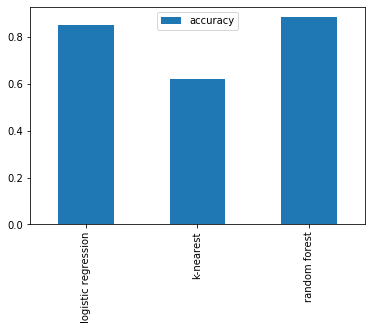

In [26]:
model_compare.T.plot.bar()

Have created baseline model, time to tune and derive additional metrics

* Hyperparam tuning
* Feature importance
* conf matrix
* cross-val
* recall 
* precision 
* f1 score
* classification report
* ROC curve 
* Aread under curve (AUC)

## Hyperparam tuning

In [27]:
# tuning knn
train_scores = []
test_scores = []

# Create list of different values for n neighbors
neighbors = range(1, 243)

# set up knn instance
knn = KNeighborsClassifier()

# Loop through different n neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit model
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update test
    test_scores.append(knn.score(X_test, y_test))

Max knn score on test data: 70.49%
Max knn score on train data: 100.00%


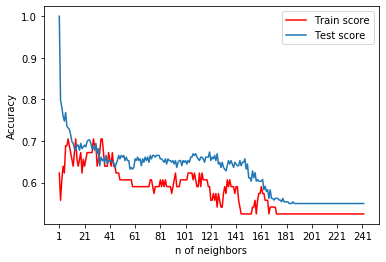

In [28]:
plt.plot(neighbors, test_scores, color='r', label='Train score')
plt.plot(neighbors, train_scores, label='Test score')
plt.legend()
plt.xticks(np.arange(1, 243, 20))
plt.xlabel('n of neighbors')
plt.ylabel('Accuracy')
print(f'Max knn score on test data: {max(test_scores) * 100:.2f}%')
print(f'Max knn score on train data: {max(train_scores) * 100:.2f}%')

## Hyperparam tuning with RandomizedSearchCV

going to tune:
- Logistic Regression
- RandomForestClassifier

... Using RSCV

In [29]:
# create a hyperparam grid for logistic regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
                'solver' : ['liblinear'],
                }

# create hyperparam grid for forest
rf_grid = {'n_estimators' : np.arange(10, 1000, 50),
           'max_depth' : [None, 3, 5, 10],
           'min_samples_split' : np.arange(2, 20, 2),
           'min_samples_leaf' : np.arange(1, 20, 2)
          }

Grids created, time to tune models with RSCV

In [30]:
# Tune logit

np.random.seed(42)

# setup random hyperparam search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparam search model for logit
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [32]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now time for RandomForest

In [33]:
# set seed
np.random.seed(42)

# set up hyperparam search
forest = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

In [34]:
# fit random hyperparam search model for Forest
forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# find best hyperparams
forest.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [36]:
# evaluate randomforest with new params
forest.score(X_test, y_test)

0.8688524590163934

## Tuning Hyperparams using GridSearchCV rather than RSCV

In [42]:
# different hyperparams for our logit model
log_reg_grid = {
                'C' : np.logspace(-4, 4, 30),
                'solver' : ['liblinear']
               }
# setup grid hyperparam search for logit model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# no n iter param, since gridsearch tries every possibility 

# fit grid hyperparam search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


0.8524590163934426

In [43]:
# check best hyperparams
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [45]:
# Evaluate the grid search on logit
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [46]:
model_scores

{'logistic regression': 0.8524590163934426,
 'k-nearest': 0.6229508196721312,
 'random forest': 0.8852459016393442}

In [47]:
# got exact same score as baseline for logit

## Evaluating our tunes machine learning classifier, beyond accuracy

Needed : 

* ROC curve
* AUC score
* Confusion Matrix
* Classification repot
* Precision, Recall, F1 score
* Use cross validation

In [51]:
# make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [52]:
y_preds

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [53]:
y_test

132    1
163    1
270    0
119    1
147    1
      ..
127    1
174    0
85     1
25     1
195    0
Name: target, Length: 61, dtype: int64

In [54]:
# ROC curve -> compares true positive rate to false positive rate

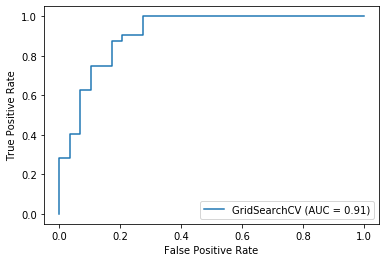

In [57]:
plot_roc_curve(gs_log_reg, X_test, y_test)
# perfect curve would be a perfect 90 degree angle

In [58]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[20  9]
 [ 0 32]]


In [113]:
sns.set(font_scale=1.5)

def conf_matrix(y_test, y_preds):
    """
    >>> Pass observed targets
    >>> Pass predicted y via model
    >>> Plots confusion matrix via heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    bottom, top = ax.get_ylim()
    
    ax.set(xlabel='True Label',
           ylabel='Predicted Label',
           title='Confusion Matrix',
           ylim=(bottom + .5, top - .5))  
    
    matrix = ax.plot()
    return matrix

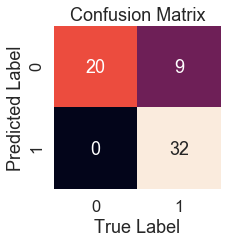

In [114]:
conf_matrix(y_test, y_preds);

# 9 False negatives, 0 false positives